# Income Qualification Prediction

In [112]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# settings to display all columns

pd.set_option("display.max_columns", None)
pd.options.display.max_rows = None

In [114]:
# reading the data

train_data = pd.read_csv('Dataset/train.csv')
test_data = pd.read_csv('Dataset/test.csv')

In [115]:
train_data.head() # viewing first few observations of train dataset

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [116]:
test_data.head() # viewing first few observations of test dataset

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,no,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


### Task 1: Identify the output variable.

In [117]:
print("The output variable is 'Target' of train_data (level of income qualification)")

The output variable is 'Target' of train_data (level of income qualification)


### Task 2: Understand the type of data.

In [118]:
train_data.shape # checking rows and cols of the train dataset

(9557, 143)

In [119]:
train_data.dtypes.value_counts()  # count of distinct datatype of columns present in the dataset

int64      130
float64      8
object       5
dtype: int64

In [120]:
test_data.shape  # checking rows and cols of the test dataset

(23856, 142)

In [121]:
test_data.dtypes.value_counts()

int64      129
float64      8
object       5
dtype: int64

### Task 3, 7, 8: Check if there are any biases and Null Values in your dataset and remove the Null Values

In [122]:
train_data.head(n = 3)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.00,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.00,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.25,64.0,121.0,8464,4


In [123]:
test_data.head(n = 3)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681


In [124]:
train_data.select_dtypes(include='object').columns  # checking columns of only object datatype 

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [125]:
test_data.select_dtypes(include='object').columns

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [126]:
train_data.dtypes[train_data.dtypes == 'object'] 

Id            object
idhogar       object
dependency    object
edjefe        object
edjefa        object
dtype: object

In [127]:
test_data.dtypes[train_data.dtypes == 'object'] 

Id            object
idhogar       object
dependency    object
edjefe        object
edjefa        object
dtype: object

In [128]:
# checking if 'dependency' column has any missing values in train dataset and test dataset

train_data['dependency'].isnull().any(), test_data['dependency'].isnull().any()  

(False, False)

In [129]:
train_data['dependency'].unique()   # checking unique values to identify why numerical column is of object type

array(['no', '8', 'yes', '3', '.5', '.25', '2', '.66666669', '.33333334',
       '1.5', '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4',
       '1.3333334', '2.25', '.22222222', '5', '.83333331', '.80000001',
       '6', '3.5', '1.6666666', '.2857143', '1.75', '.71428573',
       '.16666667', '.60000002'], dtype=object)

In [130]:
test_data['dependency'].unique()

array(['.5', 'no', '8', 'yes', '.25', '2', '.33333334', '.375',
       '.60000002', '1.5', '.2', '.75', '.66666669', '3', '.14285715',
       '.40000001', '.80000001', '1.6666666', '.2857143', '1.25', '2.5',
       '5', '.85714287', '1.3333334', '.16666667', '4', '.125',
       '.83333331', '2.3333333', '7', '1.2', '3.5', '2.25', '3.3333333',
       '6'], dtype=object)

In [131]:
# getting all the values of dependency column from train dataset, except for 'yes' and 'no'

dependency_values_train = train_data[train_data['dependency'].isin(['yes', 'no']) == False]['dependency']

In [132]:
# converting the obtained numerical values of dependency column from train dataset to float, to plot its distribution

dependency_values_train = dependency_values_train.astype('float64')

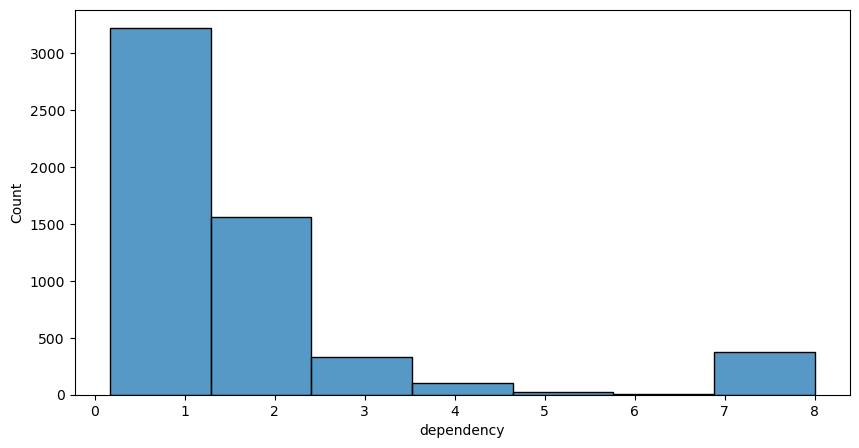

In [133]:
plt.figure(figsize=(10,5))
sns.histplot( x = dependency_values_train, bins = 7)
plt.show()

##### We will replace 'no' with 0 and 'yes' with median of 'dependency' column

In [134]:
train_data['dependency'] = train_data['dependency'].str.replace('no', '0')
test_data['dependency'] = test_data['dependency'].str.replace('no', '0')

In [135]:
median_dependency_train = train_data[train_data['dependency'] != 'yes']['dependency'].astype('float64').median()

In [136]:
train_data['dependency'] = train_data['dependency'].str.replace('yes', str(median_dependency_train)).astype('float64')
test_data['dependency'] = test_data['dependency'].str.replace('yes', str(median_dependency_train)).astype('float64')

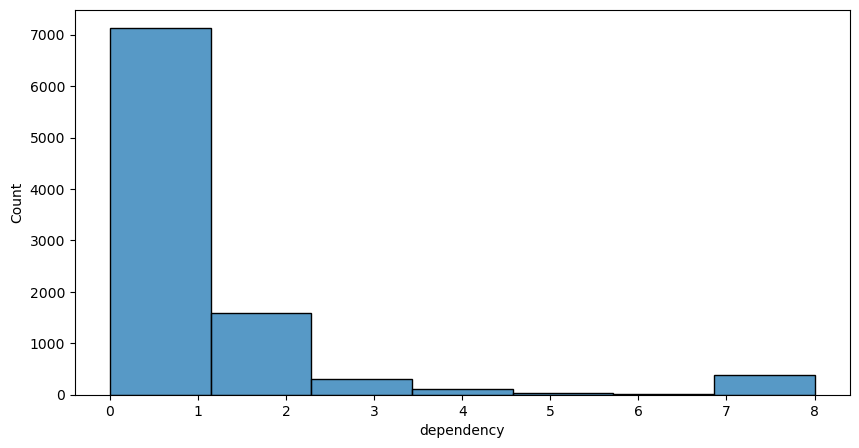

In [137]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'dependency', data = train_data, bins = 7);

In [138]:
train_data.dtypes[train_data.dtypes == 'object'] 

Id         object
idhogar    object
edjefe     object
edjefa     object
dtype: object

In [139]:
test_data.dtypes[train_data.dtypes == 'object'] 

Id         object
idhogar    object
edjefe     object
edjefa     object
dtype: object

In [140]:
train_data[['edjefe', 'edjefa']].isnull().sum()

edjefe    0
edjefa    0
dtype: int64

In [141]:
test_data[['edjefe', 'edjefa']].isnull().sum()

edjefe    0
edjefa    0
dtype: int64

In [142]:
train_data['edjefe'].unique()

array(['10', '12', 'no', '11', '9', '15', '4', '6', '8', '17', '7', '16',
       '14', '5', '21', '2', '19', 'yes', '3', '18', '13', '20'],
      dtype=object)

In [143]:
train_data['edjefa'].unique()

array(['no', '11', '4', '10', '9', '15', '7', '14', '13', '8', '17', '6',
       '5', '3', '16', '19', 'yes', '21', '12', '2', '20', '18'],
      dtype=object)

In [144]:
test_data['edjefe'].unique()

array(['no', '16', '10', '6', '11', '8', '13', '14', '5', '3', '9', '17',
       '15', '7', '21', '4', '12', '2', '20', 'yes', '19', '18'],
      dtype=object)

In [145]:
test_data['edjefa'].unique()

array(['17', 'no', '11', '14', '10', '15', '9', '6', '8', '3', '2', '5',
       '16', '12', 'yes', '7', '13', '21', '4', '19', '18', '20'],
      dtype=object)

In [146]:
# Replaced 'no'values of 'edjefe', 'edjefa' columns of train and test dataset with 0

train_data[['edjefe', 'edjefa']] = train_data[['edjefe', 'edjefa']].replace('no', '0')
test_data[['edjefe', 'edjefa']] = test_data[['edjefe', 'edjefa']].replace('no', '0')

In [147]:
# calculated the median value of 'edjefe', 'edjefa' columns excluding the 'yes' value. This median wil be used for imputation

edjefe_median_train = train_data[train_data['edjefe'] != 'yes']['edjefe'].astype('float64').median()
edjefa_median_train = train_data[train_data['edjefa'] != 'yes']['edjefa'].astype('float64').median()

In [148]:
# imputing the median value of 'edjefe' from train data, into train and test dataset's 'edjefe' column in place of 'yes'

train_data['edjefe'] = train_data['edjefe'].str.replace('yes', str(edjefe_median_train)).astype('float64')
test_data['edjefe'] = test_data['edjefe'].str.replace('yes', str(edjefe_median_train)).astype('float64')

In [149]:
# imputing the median value of 'edjefa' from train data, into train and test dataset's 'edjefe' column in place of 'yes'

train_data['edjefa'] = train_data['edjefa'].str.replace('yes', str(edjefa_median_train)).astype('float64')
test_data['edjefa'] = test_data['edjefa'].str.replace('yes', str(edjefa_median_train)).astype('float64')

In [150]:
train_data.dtypes.value_counts()

int64      130
float64     11
object       2
dtype: int64

In [151]:
test_data.dtypes.value_counts()

int64      129
float64     11
object       2
dtype: int64

In [152]:
non_categ_cols = [col for col in train_data.columns if ~train_data[col].isin([0,1]).all()]
non_categ_cols

['Id',
 'v2a1',
 'rooms',
 'v18q1',
 'r4h1',
 'r4h2',
 'r4h3',
 'r4m1',
 'r4m2',
 'r4m3',
 'r4t1',
 'r4t2',
 'r4t3',
 'tamhog',
 'tamviv',
 'escolari',
 'rez_esc',
 'hhsize',
 'idhogar',
 'hogar_nin',
 'hogar_adul',
 'hogar_mayor',
 'hogar_total',
 'dependency',
 'edjefe',
 'edjefa',
 'meaneduc',
 'bedrooms',
 'overcrowding',
 'qmobilephone',
 'age',
 'SQBescolari',
 'SQBage',
 'SQBhogar_total',
 'SQBedjefe',
 'SQBhogar_nin',
 'SQBovercrowding',
 'SQBdependency',
 'SQBmeaned',
 'agesq',
 'Target']

<AxesSubplot:xlabel='v2a1', ylabel='Density'>

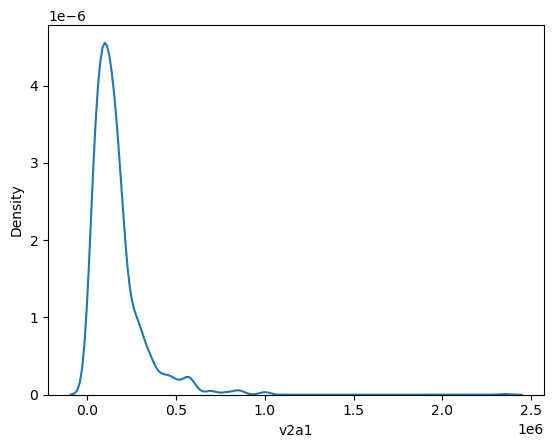

In [153]:
sns.kdeplot(train_data['v2a1'])  # Monthly Rent Payment

<AxesSubplot:xlabel='v2a1', ylabel='Count'>

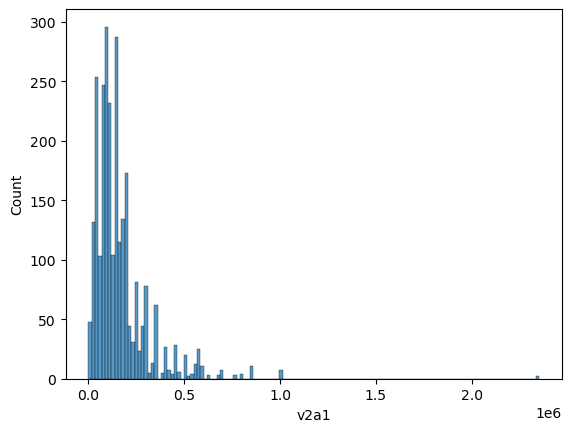

In [154]:
sns.histplot(train_data['v2a1'])  # Monthly Rent Payment

<AxesSubplot:xlabel='rooms', ylabel='count'>

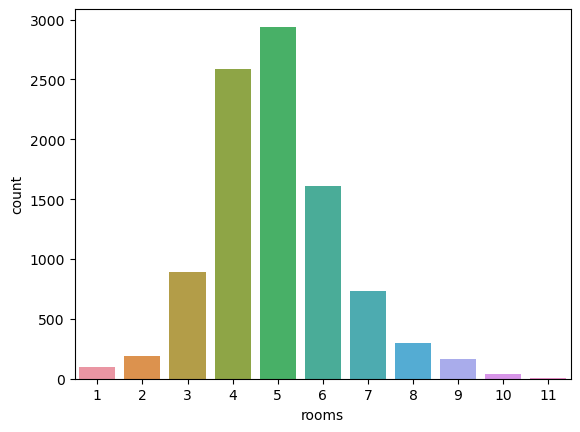

In [155]:
sns.countplot(x = 'rooms', data = train_data)

<AxesSubplot:xlabel='v18q1', ylabel='count'>

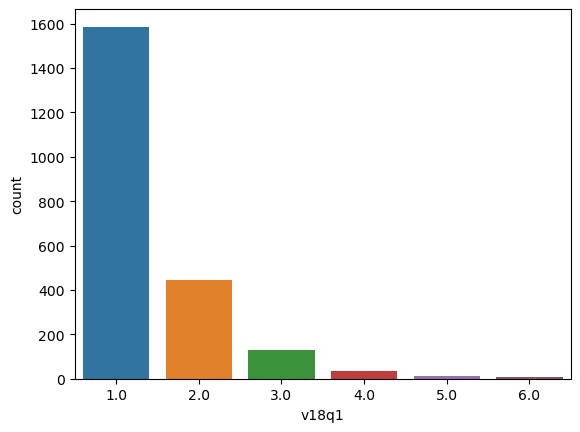

In [156]:
sns.countplot(x = 'v18q1', data = train_data) #number of tablets household owns

<AxesSubplot:xlabel='r4h1', ylabel='count'>

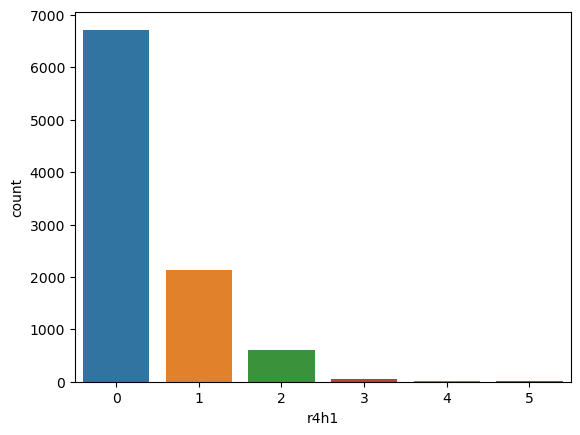

In [157]:
sns.countplot(x = 'r4h1', data = train_data) # Males younger than 12 years of age

<AxesSubplot:xlabel='r4h2', ylabel='count'>

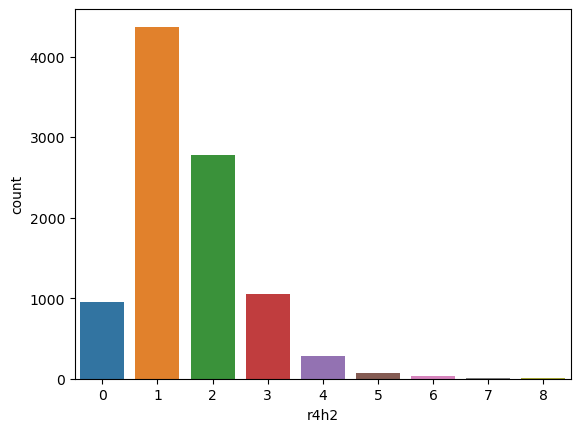

In [158]:
sns.countplot(x = 'r4h2', data = train_data )  # Males 12 years of age and older

<AxesSubplot:xlabel='r4h3', ylabel='count'>

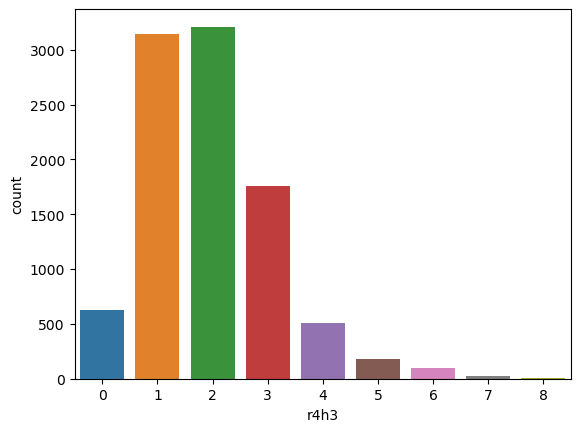

In [159]:
sns.countplot(x = 'r4h3', data = train_data )  # Total males in the household

<AxesSubplot:xlabel='r4m1', ylabel='count'>

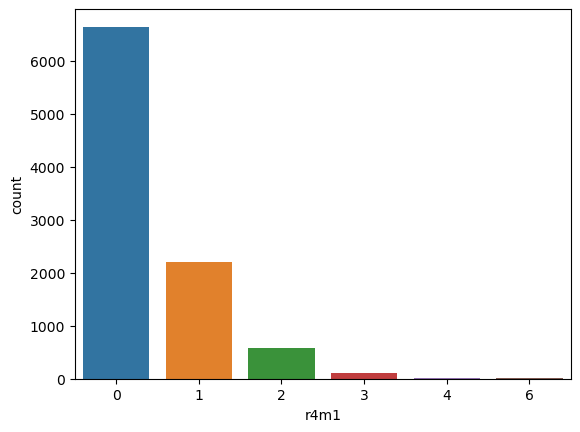

In [160]:
sns.countplot(x = 'r4m1' , data = train_data) # Females younger than 12 years of age

<AxesSubplot:xlabel='r4m2', ylabel='count'>

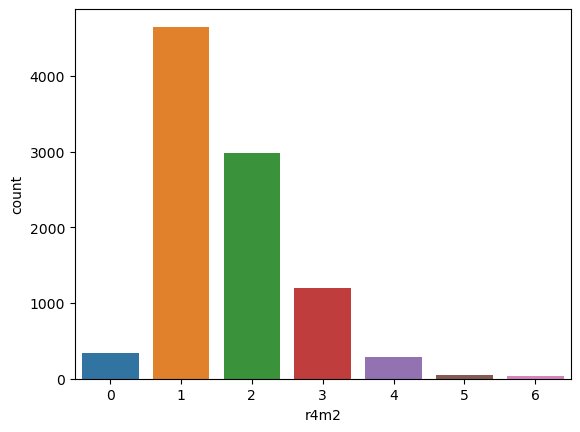

In [161]:
sns.countplot(x = 'r4m2' , data = train_data) # Females 12 years of age and older

<AxesSubplot:xlabel='r4m3', ylabel='count'>

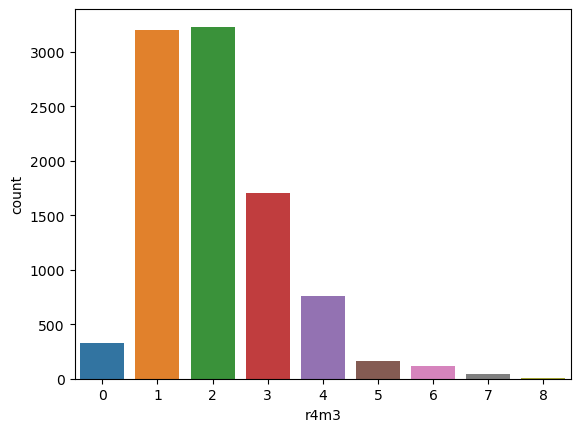

In [162]:
sns.countplot(x = 'r4m3' , data = train_data) # Total females in the household

<AxesSubplot:xlabel='r4t1', ylabel='count'>

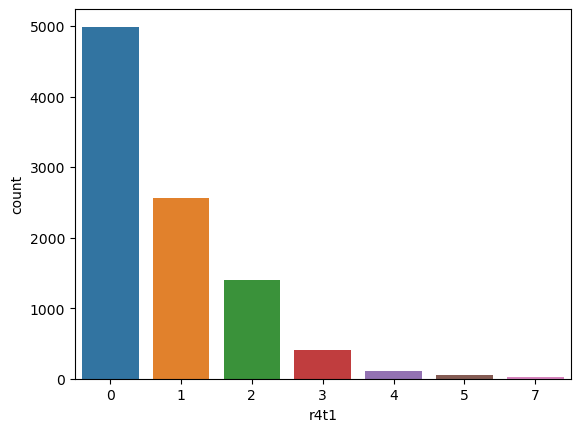

In [163]:
sns.countplot(x = 'r4t1', data = train_data) # persons younger than 12 years of age

<AxesSubplot:xlabel='r4t2', ylabel='count'>

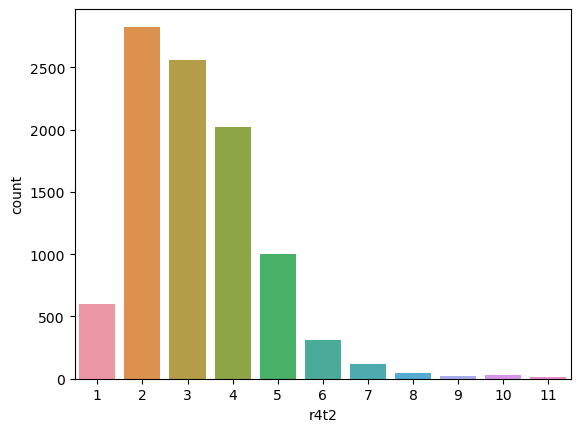

In [164]:
sns.countplot(x = 'r4t2', data = train_data) #persons 12 years of age and older

<AxesSubplot:xlabel='r4t3', ylabel='count'>

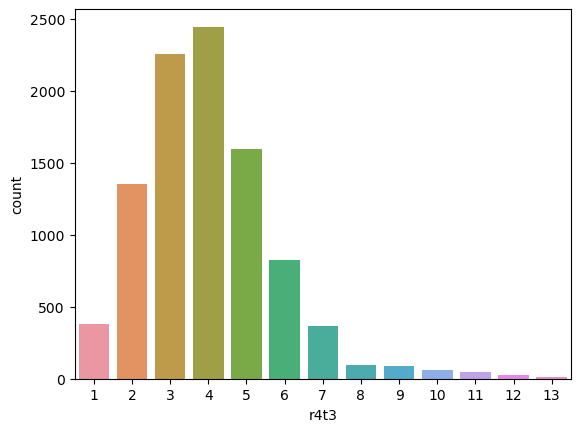

In [165]:
sns.countplot(x = 'r4t3' , data = train_data) # Total persons in the household

<AxesSubplot:xlabel='tamhog', ylabel='count'>

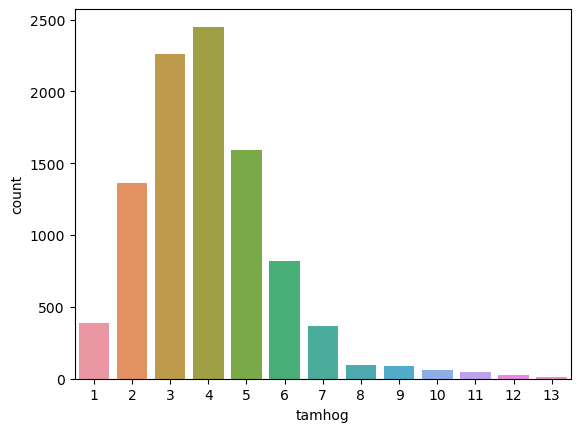

In [166]:
sns.countplot(x = 'tamhog', data = train_data) # size of the household

<AxesSubplot:xlabel='tamviv', ylabel='count'>

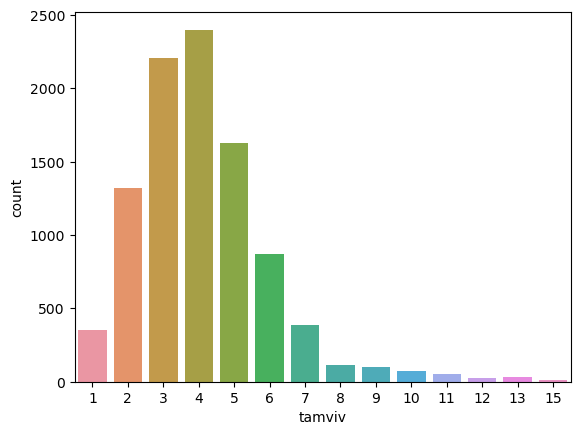

In [167]:
sns.countplot(x = 'tamviv', data = train_data) # number of persons living in the household

<AxesSubplot:xlabel='escolari', ylabel='count'>

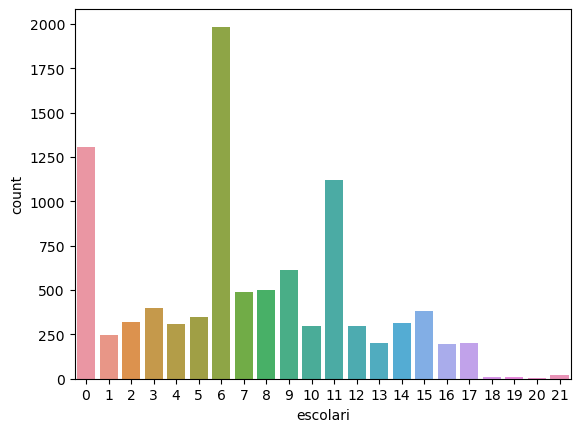

In [168]:
sns.countplot(x = 'escolari', data = train_data ) # years of schooling

<AxesSubplot:xlabel='rez_esc', ylabel='count'>

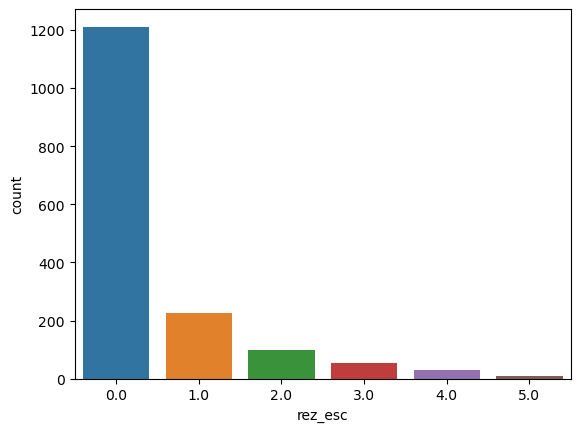

In [169]:
sns.countplot(x = 'rez_esc', data = train_data) # Years behind in school

<AxesSubplot:xlabel='hhsize', ylabel='count'>

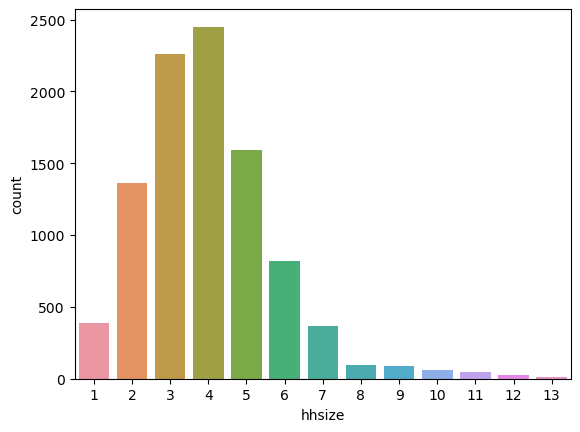

In [170]:
sns.countplot(x = 'hhsize', data = train_data) # household size

<AxesSubplot:xlabel='hogar_nin', ylabel='count'>

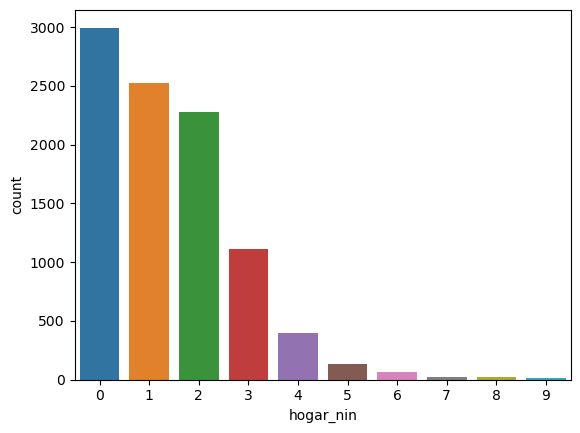

In [171]:
sns.countplot(x = 'hogar_nin', data = train_data) # Number of children 0 to 19 in household

<AxesSubplot:xlabel='hogar_adul', ylabel='count'>

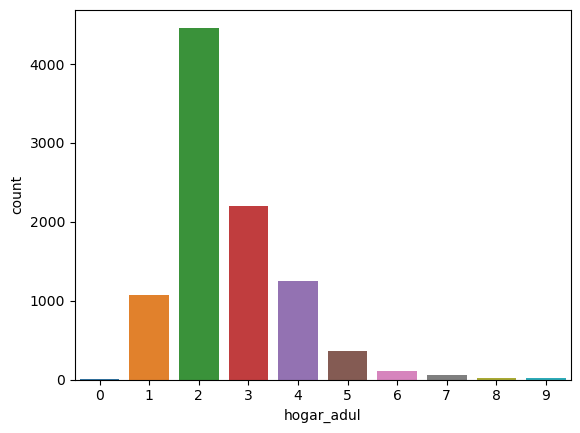

In [172]:
sns.countplot(x = 'hogar_adul', data = train_data) # Number of adults in household

<AxesSubplot:xlabel='hogar_mayor', ylabel='count'>

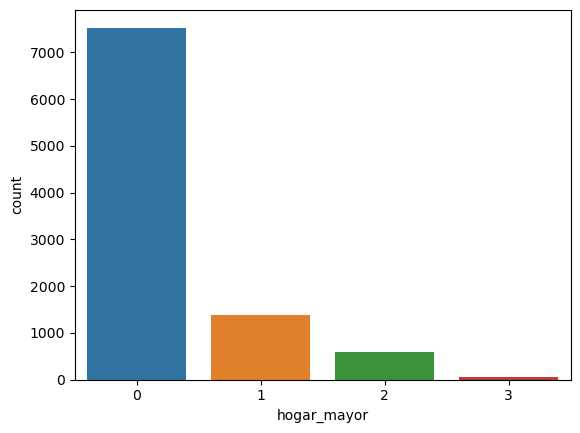

In [173]:
sns.countplot(x = 'hogar_mayor', data = train_data) # Number of individuals 65+ in the household

<AxesSubplot:xlabel='hogar_total', ylabel='count'>

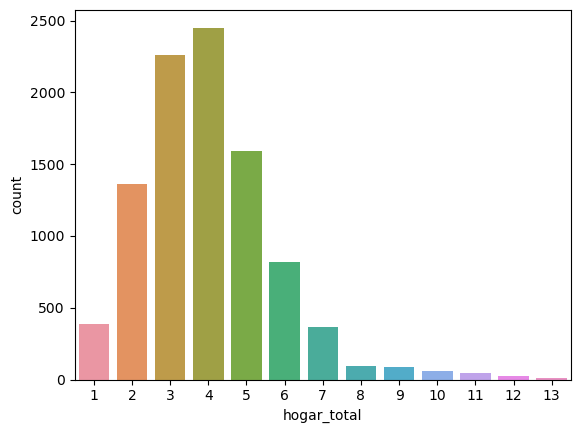

In [174]:
sns.countplot(x = 'hogar_total', data = train_data ) # Number of total individuals in the household

<AxesSubplot:xlabel='meaneduc', ylabel='Count'>

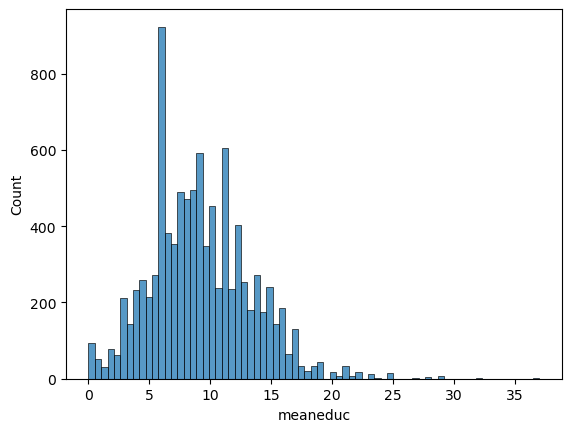

In [175]:
sns.histplot(x = 'meaneduc', data = train_data) # average years of education for adults (18+)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

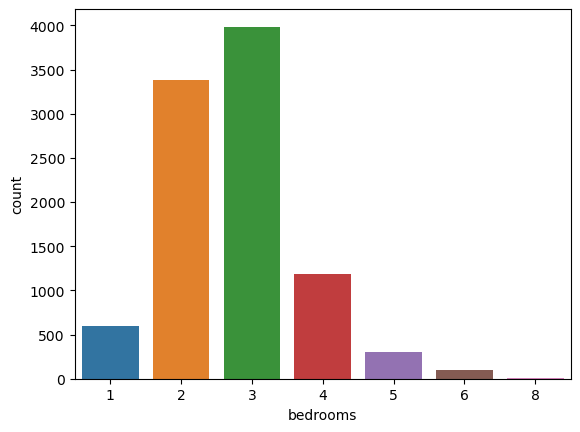

In [176]:
sns.countplot(x = 'bedrooms', data = train_data) # number of bedrooms

<AxesSubplot:xlabel='overcrowding', ylabel='Count'>

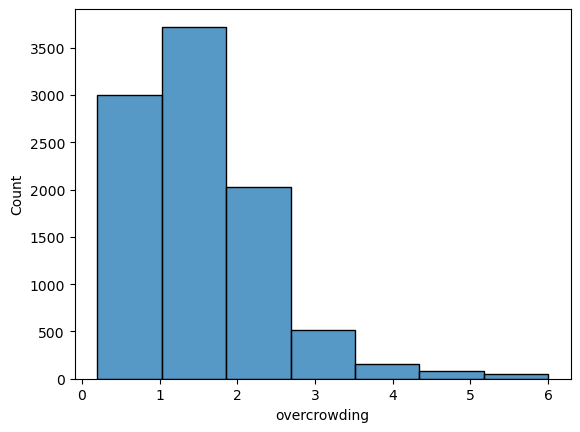

In [177]:
sns.histplot(x = 'overcrowding' , data = train_data, bins = 7) # Number of persons per room

In [178]:
train_data['overcrowding'].head()

0    1.000000
1    1.000000
2    0.500000
3    1.333333
4    1.333333
Name: overcrowding, dtype: float64

<AxesSubplot:xlabel='qmobilephone', ylabel='count'>

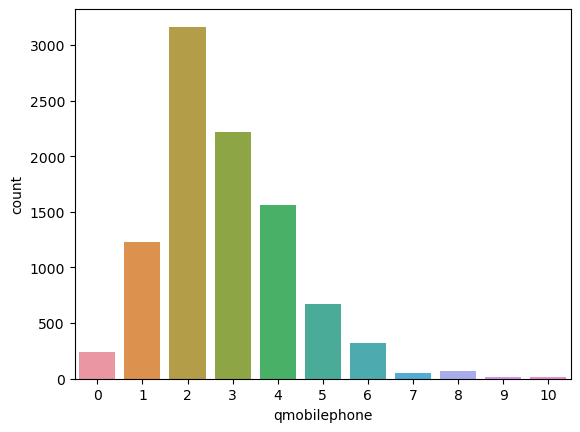

In [179]:
sns.countplot(x = 'qmobilephone' , data = train_data)

<AxesSubplot:xlabel='age', ylabel='Count'>

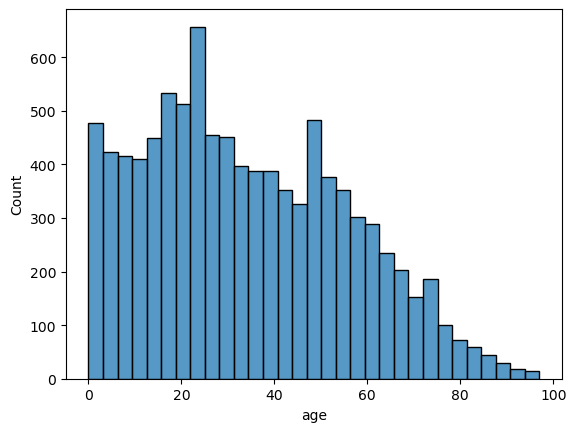

In [180]:
sns.histplot(x =  'age', data = train_data) # Age in years

<AxesSubplot:xlabel='SQBmeaned', ylabel='Count'>

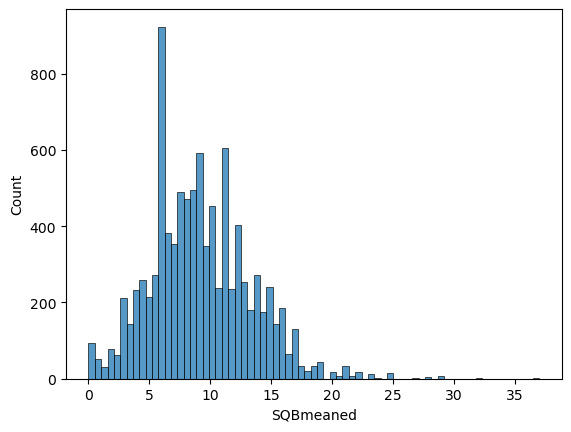

In [181]:
# SQBmeaned, square of the mean years of education of adults (>=18) in the household

mean_edu = np.sqrt(train_data['SQBmeaned'])

sns.histplot(x = mean_edu)

<AxesSubplot:xlabel='dependency', ylabel='Count'>

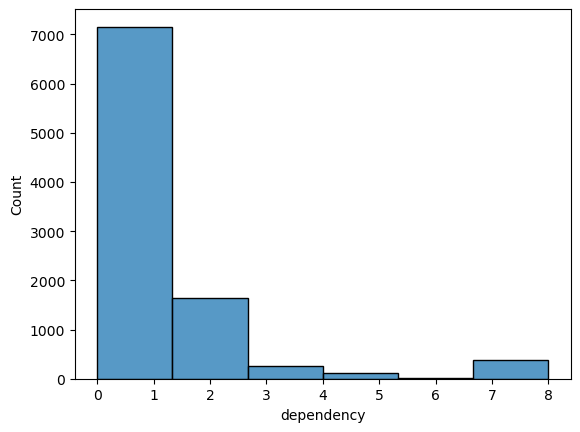

In [182]:
# Dependency rate, calculated = (number of members of the household
# younger than 19 or older than 64)/(number of member of household between 19 and 64)

sns.histplot(x = 'dependency', data = train_data, bins = 6) 

<AxesSubplot:xlabel='edjefe', ylabel='Count'>

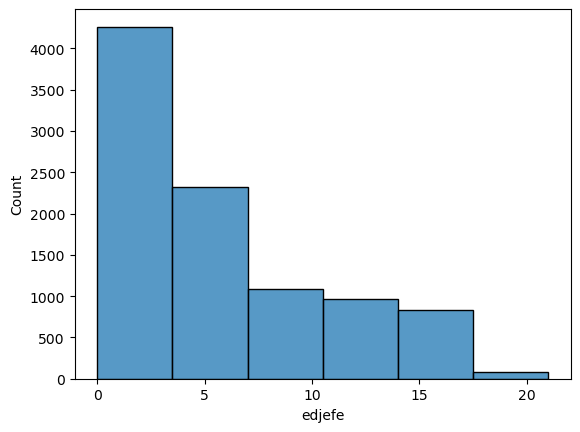

In [183]:
sns.histplot(x = 'edjefe', data = train_data, bins = 6)  # years of education of male head of household

<AxesSubplot:xlabel='edjefa', ylabel='Count'>

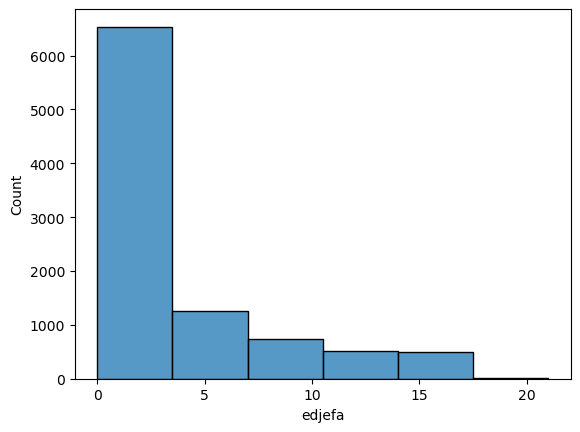

In [184]:
sns.histplot(x = 'edjefa', data = train_data, bins = 6) # years of education of female head of household

#### Analysing the target column

In [185]:
train_data['Target'].value_counts() # 

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [186]:
round(train_data['Target'].value_counts()/train_data.shape[0]*100, 2) # percent of target classes present in dataset

4    62.74
2    16.71
3    12.65
1     7.90
Name: Target, dtype: float64

In [187]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [188]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]

v2a1         17403
v18q1        18126
rez_esc      19653
meaneduc        31
SQBmeaned       31
dtype: int64

In [189]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]/train_data.shape[0]*100 # % of null values across columns (train_data)

v2a1         71.779847
v18q1        76.823271
rez_esc      82.954902
meaneduc      0.052318
SQBmeaned     0.052318
dtype: float64

In [190]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]/test_data.shape[0]*100 # % of null values across columns (test_data)

v2a1         72.950201
v18q1        75.980885
rez_esc      82.381791
meaneduc      0.129946
SQBmeaned     0.129946
dtype: float64

In [191]:
# dropping the null values column, as they have more then 70% datapoints missing

train_data.drop(['v2a1','v18q1','rez_esc'], axis=1, inplace=True)
test_data.drop(['v2a1','v18q1','rez_esc'], axis=1, inplace=True)

In [192]:
train_data[['meaneduc', 'SQBmeaned']].describe()

,meaneduc,SQBmeaned
count,9552.000000,9552.000000
mean,9.231523,102.588867
std,4.167694,93.516890
min,0.000000,0.000000
25%,6.000000,36.000000
50%,9.000000,81.000000
75%,11.600000,134.560010
max,37.000000,1369.000000


In [193]:
test_data[['meaneduc', 'SQBmeaned']].describe()

,meaneduc,SQBmeaned
count,23825.000000,23825.000000
mean,9.157474,100.509220
std,4.080513,89.211063
min,0.000000,0.000000
25%,6.000000,36.000000
50%,8.666667,75.111115
75%,11.500000,132.250000
max,36.000000,1296.000000


In [194]:
# Imputing the median values of 'meaneduc', 'SQBmeaned' from train data, into respective columns missing points of train and test dataset

train_data[['meaneduc', 'SQBmeaned']] = train_data[['meaneduc', 'SQBmeaned']].fillna(
                                                                            train_data[['meaneduc', 'SQBmeaned']].median())

test_data[['meaneduc', 'SQBmeaned']] = test_data[['meaneduc', 'SQBmeaned']].fillna(
                                                                            train_data[['meaneduc', 'SQBmeaned']].median())

In [195]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]

Series([], dtype: int64)

In [196]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]

Series([], dtype: int64)

In [217]:
train_data.duplicated().sum()

0

In [218]:
test_data.duplicated().sum()

0

#### Task 4: Check whether all members of the house have the same poverty level. 

In [205]:
# checking if the household identifier is unique across all the rows

train_data['idhogar'].nunique() == train_data.shape[0]

False

In [210]:
train_data['idhogar'].head()

0    21eb7fcc1
1    0e5d7a658
2    2c7317ea8
3    2b58d945f
4    2b58d945f
Name: idhogar, dtype: object

In [214]:
train_data.groupby('idhogar').get_group('2b58d945f') # getting the members of the group '2b58d945f'

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
3,ID_d671db89c,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,4,9,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,0.5,11.0,0.0,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,0.5,11.0,0.0,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4
5,ID_ec05b1a7b,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,0.5,11.0,0.0,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,38,121,1444,16,121,4,1.777778,1.0,121.0,1444,4
6,ID_e9e0c1100,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,4,2,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,0.5,11.0,0.0,11.0,0,1,0,0,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,8,4,64,16,121,4,1.777778,1.0,121.0,64,4


In [229]:
print(f"There are { train_data.shape[0] - train_data['idhogar'].nunique()} houses which has more then one entry in the dataset")

There are 6569 houses which has more then one entry in the dataset


In [231]:
idhogar_freq = train_data['idhogar'].value_counts()
items = idhogar_freq[idhogar_freq>1].index # items that appear more than once
items
#train_data[train_data['idhogar'].isin(items)]

Index(['fd8a6d014', 'ae6cf0558', '0c7436de6', 'b7a0b59d7', '4476ccd4c',
       '6b35cdcf0', '3fe29a56b', 'f2a4cd356', 'a18c0c0be', '63f11d6ea',
       ...
       '7098674d2', 'c89fa88a1', '19a1eba5c', '1012a6463', '42a42f94c',
       '40f1c3c06', '17e26c0f0', 'e406169b5', '54478f399', '1e7991b9d'],
      dtype='object', length=2590)

In [250]:
train_data[['idhogar', 'Target']].groupby('idhogar').filter(lambda x: (x['Target'].nunique()>1)).drop_duplicates()

,idhogar,Target
282,4b6077882,1
283,4b6077882,2
285,6833ac5dc,2
290,6833ac5dc,1
318,43b9c83e5,2
322,43b9c83e5,1
406,5c3f7725d,3
410,5c3f7725d,2
511,0f9494d3a,2
513,0f9494d3a,3


In [251]:
houses_with_diff_poverty_levels = train_data[['idhogar', 'Target']].groupby('idhogar').filter(lambda x: 
                                                                                              (x['Target'].nunique()>1)).drop_duplicates()
houses_with_diff_poverty_levels.shape

(171, 2)

In [252]:
print(f'All the members of the house do not have same poverty level. There are {houses_with_diff_poverty_levels.shape[0]} houses which has different poverty level.')

All the members of the house do not have same poverty level. There are 171 houses which has different poverty level.


#### Task 5: Check if there is a house without a family head. 

In [256]:
# parentesco1, =1 if household head

house_without_head = train_data[['idhogar', 'parentesco1']].drop_duplicates()['parentesco1'].value_counts()
house_without_head

1    2973
0    2600
Name: parentesco1, dtype: int64

In [257]:
print(f"There are {house_without_head[0]} houses without a head.")

There are 2600 houses without a head.


#### Task 6: Set poverty level of the members and the head of the house within a family.

In [259]:
poverty_level_df = train_data[['idhogar', 'Target']].groupby('idhogar')['Target'].mean()
poverty_level_df.head()

idhogar
001ff74ca    4.0
003123ec2    2.0
004616164    2.0
004983866    3.0
005905417    2.0
Name: Target, dtype: float64

In [262]:
poverty_level_df.dtype

dtype('float64')

In [265]:
poverty_level_df.unique()

array([4.        , 2.        , 3.        , 1.        , 2.6       ,
       1.33333333, 3.75      , 1.5       , 1.75      , 1.66666667,
       2.2       , 3.33333333, 2.75      , 1.83333333, 2.5       ,
       2.33333333, 3.5       , 2.63636364, 1.8       , 2.66666667,
       2.8       , 3.66666667, 2.71428571, 1.6       , 2.25      ,
       3.8       , 1.25      , 2.4       ])

In [266]:
copy_train_data = train_data.copy(deep=True)
copy_train_data.head()

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,0,3,0,1,1,0,0,1,1,0,0,0,0,1,1,1,1,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,0.0,10.0,0.0,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,0,4,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8.0,12.0,0.0,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,0,8,0,1,1,0,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8.0,0.0,11.0,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,4,9,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,0.5,11.0,0.0,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,0.5,11.0,0.0,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


#### Task 9: Predict the accuracy using random forest classifier. 

#### Task 10: Check the accuracy using random forest with cross validation.

In [200]:
### Outliars 

In [201]:
# ### PCA

# pca = PCA(n_components = 3)  

# X_train_pca = pca.fit_transform(X_train)  
# X_test_pca  = pca.transform(X_test)  

NameError: name 'PCA' is not defined

In [ ]:
# # instatiate the bagging classifier
# num_trees = 5

# classifier = RandomForestClassifier(max_depth=7, n_estimators=100)  

# classifier.fit(X_train_pca, y_train)

# # accuracy on training data
# y_pred = classifier.predict(X_train_pca)
# print('Training accuracy : {}'.format(metrics.accuracy_score(y_train, y_pred)))

# # accuracy on testing data
# y_pred = classifier.predict(X_test_pca)
# print('Testing accuracy : {}'.format(metrics.accuracy_score(y_test, y_pred)))